# 기본설치

In [ ]:
!pip install spotipy -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 252.0/252.0 kB 4.6 MB/s eta 0:00:00


In [ ]:
from google.colab import userdata
userdata.get('SPOTIFY_CLIENT_ID')

In [ ]:
import spotipy
# 인증
from spotipy.oauth2 import SpotifyClientCredentials

client = SpotifyClientCredentials(
    client_id =userdata.get('SPOTIFY_CLIENT_ID'),
    client_secret=userdata.get('SPOTIFY_CLIENT_PW')
)

In [ ]:
spot = spotipy.Spotify( client_credentials_manager = client )

# 검색

In [ ]:
track = spot.search(q='year:2024',limit=1, offset=0, type="track")
print( track )

{'tracks': {'href': 'https://api.spotify.com/v1/search?query=year%3A2024&type=track&offset=0&limit=1', 'items': [{'album': {'album_type': 'single', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/3FugScIvaEEQYbv621EhwI'}, 'href': 'https://api.spotify.com/v1/artists/3FugScIvaEEQYbv621EhwI', 'id': '3FugScIvaEEQYbv621EhwI', 'name': 'ORQUESTRA BRAVÚ XANGAI', 'type': 'artist', 'uri': 'spotify:artist:3FugScIvaEEQYbv621EhwI'}], 'available_markets': ['AR', 'AU', 'AT', 'BE', 'BO', 'BR', 'BG', 'CA', 'CL', 'CO', 'CR', 'CY', 'CZ', 'DK', 'DO', 'DE', 'EC', 'EE', 'SV', 'FI', 'FR', 'GR', 'GT', 'HN', 'HK', 'HU', 'IS', 'IE', 'IT', 'LV', 'LT', 'LU', 'MY', 'MT', 'MX', 'NL', 'NZ', 'NI', 'NO', 'PA', 'PY', 'PE', 'PH', 'PL', 'PT', 'SG', 'SK', 'ES', 'SE', 'CH', 'TW', 'TR', 'UY', 'US', 'GB', 'AD', 'LI', 'MC', 'ID', 'JP', 'TH', 'VN', 'RO', 'IL', 'ZA', 'SA', 'AE', 'BH', 'QA', 'OM', 'KW', 'EG', 'MA', 'DZ', 'TN', 'LB', 'JO', 'PS', 'IN', 'BY', 'KZ', 'MD', 'UA', 'AL', 'BA', 'HR', 'ME', 'MK'

In [ ]:
track = spot.search(q='artist:bts',limit=2, offset=0, type="track")
print( track )

{'tracks': {'href': 'https://api.spotify.com/v1/search?query=artist%3Abts&type=track&offset=0&limit=2', 'items': [{'album': {'album_type': 'album', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/3Nrfpe0tUJi4K4DXYWgMUX'}, 'href': 'https://api.spotify.com/v1/artists/3Nrfpe0tUJi4K4DXYWgMUX', 'id': '3Nrfpe0tUJi4K4DXYWgMUX', 'name': 'BTS', 'type': 'artist', 'uri': 'spotify:artist:3Nrfpe0tUJi4K4DXYWgMUX'}], 'available_markets': ['AR', 'AU', 'AT', 'BE', 'BO', 'BR', 'BG', 'CA', 'CL', 'CO', 'CR', 'CY', 'CZ', 'DK', 'DO', 'DE', 'EC', 'EE', 'SV', 'FI', 'FR', 'GR', 'GT', 'HN', 'HK', 'HU', 'IS', 'IE', 'IT', 'LV', 'LT', 'LU', 'MY', 'MT', 'MX', 'NL', 'NZ', 'NI', 'NO', 'PA', 'PY', 'PE', 'PH', 'PL', 'PT', 'SG', 'SK', 'ES', 'SE', 'CH', 'TW', 'TR', 'UY', 'US', 'GB', 'AD', 'LI', 'MC', 'ID', 'JP', 'TH', 'VN', 'RO', 'IL', 'ZA', 'SA', 'AE', 'BH', 'QA', 'OM', 'KW', 'EG', 'MA', 'DZ', 'TN', 'LB', 'JO', 'PS', 'IN', 'BY', 'KZ', 'MD', 'UA', 'AL', 'BA', 'HR', 'ME', 'MK', 'RS', 'SI', 'BD',

# 트랙 데이터에서 정보 추출

In [ ]:
import pandas as pd
'''
    - 입력 : track
    - 출력 : DataFrame 형식
        - feature
            - 아티스트 : artist_nm, artist_id,
            - 앨범 : album_thum,
            - 트랙 : track_name, track_id, track_popu, track_preview
        - 형식
            [
                {'artist_nm':'BTS', .... },
                {}, ...
            ]
'''
def get_track_info( musics ):
    # 데이터를 추출해서 아래 구조를 구성하여 df 생성
    # 실습 5분
    return [
        {
            # 아티스트
            'artist_nm'     : item["artists"][0]['name'],
            'artist_id'     : item["artists"][0]['id'],
            # 앨범
            'album_thum'    : item['album']["images"][0]['url'],
            # 트랙
            'track_name'    : item["name"],
            'track_id'      : item["id"],
            'track_popu'    : item["popularity"],
            'track_preview' : item["preview_url"],
        }
        for item in musics['tracks']['items']
    ]

songs_df = pd.DataFrame.from_dict( get_track_info( track ) )
songs_df

,artist_nm,artist_id,album_thum,track_name,track_id,track_popu,track_preview
0,BTS,3Nrfpe0tUJi4K4DXYWgMUX,https://i.scdn.co/image/ab67616d0000b273c07d5d...,Dynamite,5QDLhrAOJJdNAmCTJ8xMyW,80,https://p.scdn.co/mp3-preview/98e266fea9df84fa...
1,BTS,3Nrfpe0tUJi4K4DXYWgMUX,https://i.scdn.co/image/ab67616d0000b27317db30...,Run BTS,69xohKu8C1fsflYAiSNbwM,77,https://p.scdn.co/mp3-preview/abc4f797c5378fe6...


# 아티스트 데이터 추출

- 트랙 데이터가 여러 개라도 artist_id별로 개별 계산

In [ ]:
def get_artist_info( songs_df ):
    results = list()
    for id in songs_df.artist_id.unique():
        artist = spot.artist( id ) # 아티스트 정보 추출 -> 장르
        #print( id, artist )
        results.append( {
                'artist_id'        : id,
                # 'artist_img'        : artist['images'][0]['url], 아티스트 썸네일
                'artist_genres'    : artist['genres'],
                'artist_followers' : artist['followers']["total"],
                'artist_popularity': artist['popularity'],
        })
    return results

# 아티스트 정보 획득
artist_df = pd.DataFrame.from_dict( get_artist_info( songs_df ) )
artist_df

3Nrfpe0tUJi4K4DXYWgMUX {'external_urls': {'spotify': 'https://open.spotify.com/artist/3Nrfpe0tUJi4K4DXYWgMUX'}, 'followers': {'href': None, 'total': 73039343}, 'genres': ['k-pop', 'k-pop boy group', 'pop'], 'href': 'https://api.spotify.com/v1/artists/3Nrfpe0tUJi4K4DXYWgMUX', 'id': '3Nrfpe0tUJi4K4DXYWgMUX', 'images': [{'height': 640, 'url': 'https://i.scdn.co/image/ab6761610000e5ebd642648235ebf3460d2d1f6a', 'width': 640}, {'height': 320, 'url': 'https://i.scdn.co/image/ab67616100005174d642648235ebf3460d2d1f6a', 'width': 320}, {'height': 160, 'url': 'https://i.scdn.co/image/ab6761610000f178d642648235ebf3460d2d1f6a', 'width': 160}], 'name': 'BTS', 'popularity': 84, 'type': 'artist', 'uri': 'spotify:artist:3Nrfpe0tUJi4K4DXYWgMUX'}


,artist_id,artist_genres,artist_followers,artist_popularity
0,3Nrfpe0tUJi4K4DXYWgMUX,"[k-pop, k-pop boy group, pop]",73039343,84


In [ ]:
# 실습 1분
# songs_df을 왼쪽 기준으로 잡고 artist_df 합치기 진행 => 현재기준 (2, ?)
songs_artist_df = pd.merge( songs_df, artist_df, how='left')
songs_artist_df

,artist_nm,artist_id,album_thum,track_name,track_id,track_popu,track_preview,artist_genres,artist_followers,artist_popularity
0,BTS,3Nrfpe0tUJi4K4DXYWgMUX,https://i.scdn.co/image/ab67616d0000b273c07d5d...,Dynamite,5QDLhrAOJJdNAmCTJ8xMyW,80,https://p.scdn.co/mp3-preview/98e266fea9df84fa...,"[k-pop, k-pop boy group, pop]",73039343,84
1,BTS,3Nrfpe0tUJi4K4DXYWgMUX,https://i.scdn.co/image/ab67616d0000b27317db30...,Run BTS,69xohKu8C1fsflYAiSNbwM,77,https://p.scdn.co/mp3-preview/abc4f797c5378fe6...,"[k-pop, k-pop boy group, pop]",73039343,84


In [ ]:
songs_artist_df.shape

(2, 10)

# 음원 데이터 추출

- track_id 를 이용하여 음원의 데이터 획득
    - audio_features : 메타데이터 (활용)
        - 댄싱지수, 에너지, 템포, 밸런스, 모드, ..
    - audio_analysis : 음원분석 (배제)
        - 기본 곡에 대한 메타정보
        - 초(ms) 단위로 곡에 대한 정보
        - 빅테이터분석 -> 메가히트곡에 대한 공식 -> 패턴 모델 획득도 가능할듯

```
[
    {
        "danceability": 0.746,
            - 춤추기 적당한가? 값이 높을수록 춤추가 좋은 음악
            - 0 ~ 1.0
        "energy": 0.765,
            - 에너지, 빠르고 화려할수록 값이 높다
            - 0 ~ 1.0
        "key": 6,
        "loudness": -4.41,
            - 소리의 화려함/볼륨
            - 데시벨
        "mode": 0,
            - 단조(0), 장조(1)
        "speechiness": 0.0993,
        "acousticness": 0.0112,
        "instrumentalness": 0,
        "liveness": 0.0936,
        "valence": 0.737,
            - 음원의 밝기
            - 높을수록 기쁨, 낮을수록 슬픔,우울,화남,
            - 일차적으로는 감정와 연계하여 추천
                - 차후 다른요소도 고려하여 모델 구성
        "tempo": 114.044,
            - 단위가 큼
            - 단위 정규화 필요
                - 가장 빠른 BPM으로 MaxScaler
            - BPM
        "type": "audio_features",
        "id": "5QDLhrAOJJdNAmCTJ8xMyW",
        "uri": "spotify:track:5QDLhrAOJJdNAmCTJ8xMyW",
        "track_href": "https://api.spotify.com/v1/tracks/5QDLhrAOJJdNAmCTJ8xMyW",
        "analysis_url": "https://api.spotify.com/v1/audio-analysis/5QDLhrAOJJdNAmCTJ8xMyW",
        "duration_ms": 199054,
        "time_signature": 4
    }
]
```

```
    [
        {
            'track_id':song_id,
            'danceability':'',
            'energy':'',
            'tempo':'',
            'valence':'',
            'mode':''
        }
    ]
```

In [ ]:
# 실습 2분 : 추출
def get_song_feature( songs_artist_df ):
    results = list()
    for song_id in songs_artist_df.track_id:
        #print( song_id )
        # 트랙 아이디 기반 곡의 세부 정보 획득
        song_af = spot.audio_features( song_id )
        # 정보를 획득하지 못할경우 -> [None] 이렇게 오기도함
        # 미사용
        #song_aa = spot.audio_analysis( song_id )
        if song_af[0]:
            results.append({
                'track_id'      :song_id,
                'danceability'  :song_af[0]['danceability'],
                'energy'        :song_af[0]['energy'],
                'tempo'         :song_af[0]['tempo'],
                'valence'       :song_af[0]['valence'],
                'mode'          :song_af[0]['mode']
            })
        #break
    return results

song_feat_df = pd.DataFrame.from_dict( get_song_feature( songs_artist_df ) )
song_feat_df

5QDLhrAOJJdNAmCTJ8xMyW
69xohKu8C1fsflYAiSNbwM


,track_id,danceability,energy,tempo,valence,mode
0,5QDLhrAOJJdNAmCTJ8xMyW,0.746,0.765,114.044,0.737,0
1,69xohKu8C1fsflYAiSNbwM,0.724,0.818,77.004,0.696,1


In [ ]:
print( song_af )

[{'danceability': 0.746, 'energy': 0.765, 'key': 6, 'loudness': -4.41, 'mode': 0, 'speechiness': 0.0993, 'acousticness': 0.0112, 'instrumentalness': 0, 'liveness': 0.0936, 'valence': 0.737, 'tempo': 114.044, 'type': 'audio_features', 'id': '5QDLhrAOJJdNAmCTJ8xMyW', 'uri': 'spotify:track:5QDLhrAOJJdNAmCTJ8xMyW', 'track_href': 'https://api.spotify.com/v1/tracks/5QDLhrAOJJdNAmCTJ8xMyW', 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/5QDLhrAOJJdNAmCTJ8xMyW', 'duration_ms': 199054, 'time_signature': 4}]


In [ ]:
songs_artist_feat_df = pd.merge( songs_artist_df, song_feat_df, how='left')
songs_artist_feat_df

,artist_nm,artist_id,album_thum,track_name,track_id,track_popu,track_preview,artist_genres,artist_followers,artist_popularity,danceability,energy,tempo,valence,mode
0,BTS,3Nrfpe0tUJi4K4DXYWgMUX,https://i.scdn.co/image/ab67616d0000b273c07d5d...,Dynamite,5QDLhrAOJJdNAmCTJ8xMyW,80,https://p.scdn.co/mp3-preview/98e266fea9df84fa...,"[k-pop, k-pop boy group, pop]",73039343,84,0.746,0.765,114.044,0.737,0
1,BTS,3Nrfpe0tUJi4K4DXYWgMUX,https://i.scdn.co/image/ab67616d0000b27317db30...,Run BTS,69xohKu8C1fsflYAiSNbwM,77,https://p.scdn.co/mp3-preview/abc4f797c5378fe6...,"[k-pop, k-pop boy group, pop]",73039343,84,0.724,0.818,77.004,0.696,1


# 레이다 차트

- 음원의 피처들을 이용하여 각 성분의 값들을 배치하여 특성을 표현하는 시각화
- 이를 기반으로 인사이트 분석후 모델 학습에 사용하는 방식으로 전개 - 생략

In [ ]:
track_feat_df = songs_artist_feat_df[ ['track_name', 'danceability', 'energy','tempo','valence' ]]
track_feat_df

,track_name,danceability,energy,tempo,valence
0,Dynamite,0.746,0.765,114.044,0.737
1,Run BTS,0.724,0.818,77.004,0.696


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 레이다 차트를 위한 재료
from math import pi
from matplotlib.path import Path
from matplotlib.spines import Spines
from matplotlib.transforms import Affine2D

In [ ]:
# tempo값 단위 조정
# 현존하는 음악들중 최대 템포값(헤비메탈에서 350)
# 350기준으로 정규화 -> 의미를 가질려면 인사이트 도입 필요 -> 편의상 진행
# QnA 아래 df에서 수행
track_feat_df['tempo'] =  track_feat_df['tempo'].apply( lambda x:x/350 )

<ipython-input-41-6ab5fc0ef694>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  track_feat_df['tempo'] =  track_feat_df['tempo'].apply( lambda x:x/350 )


In [ ]:
df = track_feat_df.copy(True)
df

,track_name,danceability,energy,tempo,valence
0,Dynamite,0.746,0.765,0.325840,0.737
1,Run BTS,0.724,0.818,0.220011,0.696


Index(['danceability', 'energy', 'tempo', 'valence'], dtype='object') 4
[0.0, 1.5707963267948966, 3.141592653589793, 4.71238898038469, 0.0]


<ipython-input-71-494d5da66a0f>:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cus_pal = plt.cm.get_cmap("Set2", df.shape[0]) # 데이터별 색상을 다르게 부여


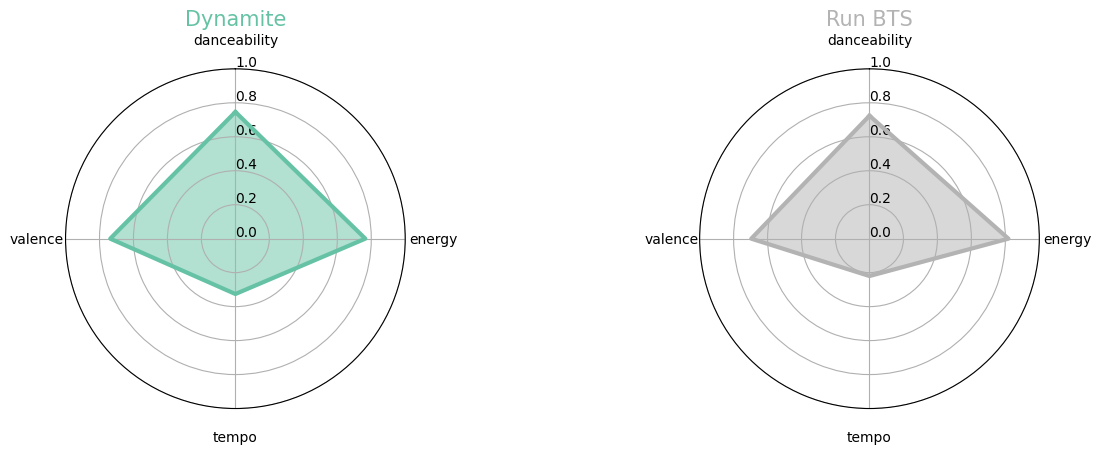

In [ ]:
# 1. 차트에 표시될 피처만 추출
features    = df.columns[1:]
# 2. 차트에 표시될 피처의 개수
num_feature = len(features)

print( features, num_feature )

# 3. 각 포인트에 대한 등분점
angles = [
    i/float(num_feature) * (pi*2)
    for i in range( num_feature) # 0, 1, 2, 3
]
angles += angles[:1] # 순환되야 하므로, 최초 좌표를 마지막에 다시 넣어줌
print( angles )

# 4. 데코레이션 -> 색상
cus_pal = plt.cm.get_cmap("Set2", df.shape[0]) # 데이터별 색상을 다르게 부여

# 5. 차트 모양
fig = plt.figure(figsize=(15, 15)) # 필요시 해당 방향을 증가
fig.set_facecolor('white')

# 6. 반복하면서 트랙별 레이더 차트 드로잉, 데이터 추출->iloc[i] or iterrows()
for i, data in df.iterrows(): # 데이터에 대한 인덱스값, 실데이터(Series)

    # 6-1. 실데이터->해당 피처만 적용-> 순환구조(최초값을 다시 대입)
    temp = data.values[1:].tolist()
    temp += temp[:1]
    temp

    # 6-2. 색상값 획득
    color = cus_pal(i)

    # 6-3.
    # polar=True => Spider Plot 기본 옵션
    # i+1 : 1부터적용
    # nums, cols => 여러개 차트 부여시 칸에 대한 설정
    ax = plt.subplot(3, 2, i+1, polar=True) # nums, cols, index, polar옵션
    # 시작점의 좌표값, 그려지는 방향
    ax.set_theta_offset(pi/2)  # 시작점
    ax.set_theta_direction(-1) # 시계방향으로 드로잉

    #print(i, temp, color)
    # 6-4. x 축정보 세팅, angles의 전체데이터는 플로팅시만 필요 -> 마지막 하나 배제
    plt.xticks(angles[:-1], features, fontsize=10)
    # x축에 정보 표시시 여백 부여
    plt.tick_params( axis='x', pad=10)

    # 6-5. y 축정보 세팅
    # 좌표 표시 단위는 설정 , np.linespace( 최소, 최대, 간격 )
    # 등간격은 균일 혹은 특정구간은 조밀하게 조합 가능
    plt.yticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0 ],
               ['0.0', '0.2', '0.4', '0.6', '0.8', '1.0' ]
               , fontsize=10
               )

    plt.ylim(0.0, 1.0) # 각 지표의 최소값 최대값  설정
    # y각도 조절(dgree 단위)
    ax.set_rlabel_position(0)


    # 6-6. 플로팅 - 그리기
    ax.plot( angles, temp, color=color, linewidth=3, linestyle='solid')
    ax.fill( angles, temp, color=color, alpha=0.5) # 채우기 반투명

    # 6-7. 제목
    plt.title(data['track_name'], size=15, color=color)

    #break

#plt.legend()
plt.show()

- 레이더 차트를 통해서 BTS 곡 이 비슷한 양상을 보였다
    - 샘플 2개 기준, 데이터가 많으면 달라질수 있음
    - 인감의 감정
        - 7단계 정리
            - 연속적이 값으로 표현 가능한가?
                - 인사이트부족
            - 연속적이라는 가정 진행
                - 공포 < 혐오 < 분노 < 슬픔 < 중립 < 놀람 < 행복
        - 음원의 valence
            - (우울)0 ~ 1(행복)

In [ ]:
valence_step = np.linspace( 0, 1, 8 )
valence_step

array([0.        , 0.14285714, 0.28571429, 0.42857143, 0.57142857,
       0.71428571, 0.85714286, 1.        ])

- 위의 단순 분류기준으로 정리(단순 시나리오)
    - BTS의 다이나믹 -> valence -> 0.746
    - valence_step 간격중 6번째에 위치
    - 공포(0) < 혐오(1) < 분노(2) < 슬픔(3) < 중립(4) < 놀람(5) < 행복(6)
        - 놀람의 단계에 해당
    - 문장 입력 => 감정분석 -> 놀람(기쁨의 놀람 가정) -> 이런 감정상태에서 -> 추천되는 곡
        - valence_step 값이
            - 0.71428571<= valence <=0.85714286
            - 인곡에서 추천

- 감정을 하나의 지표로 판단하기는 무리
    - 복합적인 피처로 판단 필요 -> 추가 모델 작업

# 대량의 데이터 획득

- 검색
    - 1회 요청시 최대 50건
    - 500건만 요청해서 획득 실습
        - 자동 처리되게 함수 조정 일부 진행

In [ ]:
%%time
import time
import random

time.sleep( 1*random.random() )

CPU times: user 6.57 ms, sys: 1.84 ms, total: 8.41 ms
Wall time: 874 ms


In [ ]:
def get_tracks_500( query, limit, max_song_count ):
    tracks_list = list()

    # offset : 0, 0+limit, 0+limit*2, ...
    for i in range(0, max_song_count, limit):
        tracks = spot.search(q=query,limit=limit, offset=0, type="track")

        df     = pd.DataFrame.from_dict( get_track_info(tracks) )
        tracks_list.append( df )

        # 요청의 탬포 조절
        time.sleep( 1*random.random() )

    # df가 리스트에 담겨서 리턴 (모든 df은 같은 구조임)
    return tracks_list


tracks_list = get_tracks_500( 'year:2024', limit=50, max_song_count=500 )

In [ ]:
all_songs_df = pd.concat( tracks_list )
all_songs_df.shape

(500, 7)

In [ ]:
# 500곡에 대한 트랙 정보 저장
all_songs_df.to_csv('/content/drive/MyDrive/데이터분석스쿨2기/share/12.데이터활용및과학방법론-12/spot/all_songs_df_500.csv')